In [1]:
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
data_train = pd.read_csv("C:\\Users\\admin\\Documents\\Academics\\THIRD year\\sixth sem\\internship ML\\train.csv")


In [2]:
print(data_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   vidid      14999 non-null  object
 1   adview     14999 non-null  int64 
 2   views      14999 non-null  object
 3   likes      14999 non-null  object
 4   dislikes   14999 non-null  object
 5   comment    14999 non-null  object
 6   published  14999 non-null  object
 7   duration   14999 non-null  object
 8   category   14999 non-null  object
dtypes: int64(1), object(8)
memory usage: 1.0+ MB
None


In [3]:
data_train.shape

(14999, 9)

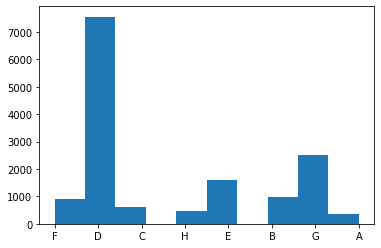

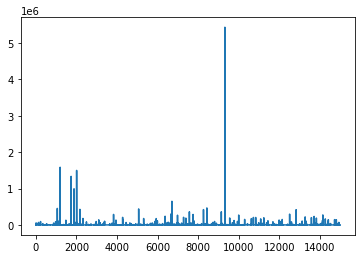

In [4]:
# Visualization
# Individual Plots
plt.hist(data_train["category"])
plt.show()
plt.plot(data_train["adview"])
plt.show()

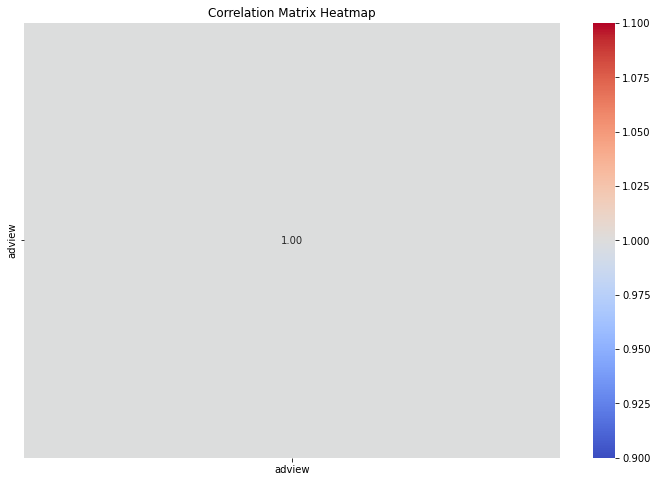

In [5]:
# Heatmap for correlation matrix
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.heatmap(data_train.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [6]:
data_train.dropna(inplace=True)

In [7]:
# Removing character "F" present in data
data_train=data_train[data_train.views!='F']
data_train=data_train[data_train.likes!='F']
data_train=data_train[data_train.dislikes!='F']
data_train=data_train[data_train.comment!='F']
print(data_train)

           vidid  adview    views likes dislikes comment   published duration  \
0      VID_18655      40  1031602  8523      363    1095  2016-09-14  PT7M37S   
1      VID_14135       2     1707    56        2       6  2016-10-01  PT9M30S   
2       VID_2187       1     2023    25        0       2  2016-07-02  PT2M16S   
3      VID_23096       6   620860   777      161     153  2016-07-27  PT4M22S   
4      VID_10175       1      666     1        0       0  2016-06-29    PT31S   
...          ...     ...      ...   ...      ...     ...         ...      ...   
14994     VID_31       2   525949  1137       83      86  2015-05-18  PT6M10S   
14995   VID_5861       1   665673  3849      156     569  2015-10-20  PT3M56S   
14996    VID_805       4     3479    16        1       1  2013-08-23  PT3M13S   
14997  VID_19843       1      963     0        0       0  2010-10-02    PT26S   
14998   VID_8534       1    15212    22        5       4  2016-02-19   PT1M1S   

      category  
0         

In [8]:
# Assigning each category a number for Category feature
category={'A': 1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
data_train["category"]=data_train["category"].map(category)
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,6
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,4
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,3
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,8
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,4


In [9]:
# Convert values to integers for views, likes, comments, dislikes and adview
data_train["views"] = pd.to_numeric(data_train["views"])
data_train["comment"] = pd.to_numeric(data_train["comment"])
data_train["likes"] = pd.to_numeric(data_train["likes"])
data_train["dislikes"] = pd.to_numeric(data_train["dislikes"])
data_train["adview"]=pd.to_numeric(data_train["adview"])
column_vidid=data_train['vidid']
# Endoding features like Category, Duration, Vidid
from sklearn.preprocessing import LabelEncoder
data_train['duration']=LabelEncoder().fit_transform(data_train['duration'])
data_train['vidid']=LabelEncoder().fit_transform(data_train['vidid'])
data_train['published']=LabelEncoder().fit_transform(data_train['published'])
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,2925,6
1,2741,2,1707,56,2,6,2185,3040,4
2,8138,1,2023,25,0,2,2094,1863,3
3,9005,6,620860,777,161,153,2119,2546,8
4,122,1,666,1,0,0,2091,1963,4


In [10]:
# Convert Time_in_sec for duration
import datetime
import time
def checki(x):
    y = x[2:]
    h = ''
    m = ''
    s = ''
    mm = ''
    P = ['H','M','S']
    for i in y:
        if i not in P:
            mm+=i
        else:
            if(i=="H"):
                h = mm
                mm = ''
            elif(i == "M"):
                m = mm
                mm = ''
            else:
                s = mm
                mm = ''
    if(h==''):
        h = '00'
    if(m == ''):

        m = '00'
    if(s==''):
        s='00'
    bp = h+':'+m+':'+s
    return bp
train=pd.read_csv("C:\\Users\\admin\\Documents\\Academics\\THIRD year\\sixth sem\\internship ML\\train.csv")
mp = pd.read_csv("C:\\Users\\admin\\Documents\\Academics\\THIRD year\\sixth sem\\internship ML\\train.csv")["duration"]
time = mp.apply(checki)
def func_sec(time_string):
    h, m, s = time_string.split(':')
    return int(h) * 3600 + int(m) * 60 + int(s)
time1=time.apply(func_sec)
data_train["duration"]=time1
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,457,6
1,2741,2,1707,56,2,6,2185,570,4
2,8138,1,2023,25,0,2,2094,136,3
3,9005,6,620860,777,161,153,2119,262,8
4,122,1,666,1,0,0,2091,31,4


In [11]:
# Split Data
Y_train = pd.DataFrame(data = data_train.iloc[:, 1].values, columns = ['target'])
data_train=data_train.drop(["adview"],axis=1)
data_train=data_train.drop(["vidid"],axis=1)
data_train.head()

,views,likes,dislikes,comment,published,duration,category
0,1031602,8523,363,1095,2168,457,6
1,1707,56,2,6,2185,570,4
2,2023,25,0,2,2094,136,3
3,620860,777,161,153,2119,262,8
4,666,1,0,0,2091,31,4


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_train, Y_train, test_size=0.2, random_state=42)
X_train.shape

(11709, 7)

In [13]:
# Normalise Data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)
X_train.mean()

0.17395410595763316

In [14]:
# Evaluation Metrics
from sklearn import metrics
def print_error(X_test, y_test, model_name):
    prediction = model_name.predict(X_test)
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction))
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

In [15]:
# Linear Regression
from sklearn import linear_model
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X_train, y_train)
print_error(X_test,y_test, linear_regression)

Mean Absolute Error: 5288.05921209174
Mean Squared Error: 10881114821.641329
Root Mean Squared Error: 104312.58227865577


In [16]:
# Support Vector Regressor
from sklearn.svm import SVR
supportvector_regressor = SVR()
supportvector_regressor.fit(X_train,y_train.values.ravel())
print_error(X_test,y_test, supportvector_regressor)

Mean Absolute Error: 3478.040658670919
Mean Squared Error: 10901271708.174868
Root Mean Squared Error: 104409.15528905914


In [17]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)
print_error(X_test,y_test, decision_tree)

Mean Absolute Error: 5269.914959016393
Mean Squared Error: 12199335153.856216
Root Mean Squared Error: 110450.60051378723


In [18]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
n_estimators = 200
max_depth = 25
min_samples_split=15
min_samples_leaf=2
random_forest = RandomForestRegressor(n_estimators = n_estimators, max_depth = max_depth, min_samples_split=min_samples_split)
random_forest.fit(X_train,y_train.values.ravel())
print_error(X_test,y_test, random_forest)

Mean Absolute Error: 5079.816224463016
Mean Squared Error: 10466213846.193916
Root Mean Squared Error: 102304.51527764509


In [19]:
# Artificial Neural Network
import keras
import tensorflow as tf
from keras.layers import Dense
ann = keras.models.Sequential([
    Dense(6, activation="relu",
    input_shape=X_train.shape[1:]),
    Dense(6,activation="relu"),
    Dense(1)
    ])
optimizer=tf.keras.optimizers.Adam()
loss=keras.losses.mean_squared_error
ann.compile(optimizer=optimizer,loss=loss,metrics=["mean_squared_error"])
history=ann.fit(X_train,y_train,epochs=100)
ann.summary()
print_error(X_test,y_test,ann)

Epoch 1/100
366/366 [==============================] - 2s 2ms/step - loss: 767616896.0000 - mean_squared_error: 767616896.0000
Epoch 2/100
366/366 [==============================] - 1s 2ms/step - loss: 767610368.0000 - mean_squared_error: 767610368.0000
Epoch 3/100
366/366 [==============================] - 1s 2ms/step - loss: 767596736.0000 - mean_squared_error: 767596736.0000
Epoch 4/100
366/366 [==============================] - 1s 2ms/step - loss: 767574464.0000 - mean_squared_error: 767574464.0000
Epoch 5/100
366/366 [==============================] - 1s 2ms/step - loss: 767539200.0000 - mean_squared_error: 767539200.0000
Epoch 6/100
366/366 [==============================] - 1s 2ms/step - loss: 767492160.0000 - mean_squared_error: 767492160.0000
Epoch 7/100
366/366 [==============================] - 1s 2ms/step - loss: 767436800.0000 - mean_squared_error: 767436800.0000
Epoch 8/100
366/366 [==============================] - 1s 2ms/step - loss: 767371264.0000 - mean_squared_error:

In [23]:
#Saving Scikitlearn models
import joblib
joblib.dump(decision_tree, "decisiontree_youtubeadview.pkl")
# Saving Keras Artificial Neural Network model
ann.save("ann_youtubeadview.h5")

In [25]:
# Load the saved models (for demonstration purposes)
loaded_ann = keras.models.load_model('ann_youtubeadview.h5')
loaded_decision_tree = joblib.load('decisiontree_youtubeadview.pkl')

In [26]:
test_df = pd.read_csv("C:\\Users\\admin\\Documents\\Academics\\THIRD year\\sixth sem\\internship ML\\test.csv")

In [27]:
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8764 entries, 0 to 8763
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   vidid      8764 non-null   object
 1   views      8764 non-null   object
 2   likes      8764 non-null   object
 3   dislikes   8764 non-null   object
 4   comment    8764 non-null   object
 5   published  8764 non-null   object
 6   duration   8764 non-null   object
 7   category   8764 non-null   object
dtypes: object(8)
memory usage: 547.9+ KB
None


In [28]:
test_df.shape

(8764, 8)

In [29]:
test_df.dropna(inplace=True)

In [30]:
# Removing character "F" present in data
test_df=test_df[test_df.views!='F']
test_df=test_df[test_df.likes!='F']
test_df=test_df[test_df.dislikes!='F']
test_df=test_df[test_df.comment!='F']
print(test_df)

          vidid    views likes dislikes comment   published    duration  \
0      VID_1054   440238  6153      218    1377  2017-02-18     PT7M29S   
1     VID_18629  1040132  8171      340    1047  2016-06-28     PT6M29S   
2     VID_13967    28534    31       11       1  2014-03-10    PT37M54S   
3     VID_19442  1316715  2284      250     274  2010-06-05     PT9M55S   
4       VID_770  1893173  2519      225     116  2016-09-03      PT3M8S   
...         ...      ...   ...      ...     ...         ...         ...   
8759   VID_2944   111205   471       14     101  2011-04-19     PT3M14S   
8760   VID_8195  1074457  1024      195      65  2016-06-03  PT2H18M35S   
8761  VID_18973  1891692  4606     1109     191  2016-06-26     PT7M14S   
8762   VID_5849   714859  1639      151     382  2016-03-23     PT3M15S   
8763   VID_8494     5297    12        1       0  2016-12-19    PT10M14S   

     category  
0           B  
1           F  
2           D  
3           G  
4           B  
...

In [31]:
# Assigning each category a number for Category feature
category={'A': 1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
test_df["category"]=test_df["category"].map(category)
test_df.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,2
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,6
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,4
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,7
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,2


In [33]:
# Convert values to integers for views, likes, comments, dislikes
test_df["views"] = pd.to_numeric(test_df["views"])
test_df["comment"] = pd.to_numeric(test_df["comment"])
test_df["likes"] = pd.to_numeric(test_df["likes"])
test_df["dislikes"] = pd.to_numeric(test_df["dislikes"])
column_vidid=test_df['vidid']
# Endoding features like Category, Duration, Vidid
from sklearn.preprocessing import LabelEncoder
test_df['duration']=LabelEncoder().fit_transform(test_df['duration'])
test_df['vidid']=LabelEncoder().fit_transform(test_df['vidid'])
test_df['published']=LabelEncoder().fit_transform(test_df['published'])
test_df.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,231,440238,6153,218,1377,2053,2115,2
1,3444,1040132,8171,340,1047,1825,2055,6
2,1593,28534,31,11,1,1009,1506,4
3,3775,1316715,2284,250,274,116,2265,7
4,7644,1893173,2519,225,116,1892,1625,2


In [34]:
# Convert Time_in_sec for duration
import datetime
import time
def checki(x):
    y = x[2:]
    h = ''
    m = ''
    s = ''
    mm = ''
    P = ['H','M','S']
    for i in y:
        if i not in P:
            mm+=i
        else:
            if(i=="H"):
                h = mm
                mm = ''
            elif(i == "M"):
                m = mm
                mm = ''
            else:
                s = mm
                mm = ''
    if(h==''):
        h = '00'
    if(m == ''):

        m = '00'
    if(s==''):
        s='00'
    bp = h+':'+m+':'+s
    return bp
train=pd.read_csv("C:\\Users\\admin\\Documents\\Academics\\THIRD year\\sixth sem\\internship ML\\test.csv")
mp = pd.read_csv("C:\\Users\\admin\\Documents\\Academics\\THIRD year\\sixth sem\\internship ML\\test.csv")["duration"]
time = mp.apply(checki)
def func_sec(time_string):
    h, m, s = time_string.split(':')
    return int(h) * 3600 + int(m) * 60 + int(s)
time1=time.apply(func_sec)
data_train["duration"]=time1
data_train.head()

,views,likes,dislikes,comment,published,duration,category
0,1031602,8523,363,1095,2168,449.0,6
1,1707,56,2,6,2185,389.0,4
2,2023,25,0,2,2094,2274.0,3
3,620860,777,161,153,2119,595.0,8
4,666,1,0,0,2091,188.0,4


In [35]:
# Split Data
Y_train = pd.DataFrame(data = test_df.iloc[:, 1].values, columns = ['target'])
test_df=test_df.drop(["vidid"],axis=1)
test_df.head()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(test_df, Y_train, test_size=0.2, random_state=42)
X_train.shape

(6839, 7)

In [36]:
# Normalise Data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)
X_train.mean()

0.2504765528315028

In [37]:
ann_predictions = loaded_ann.predict(X_test)

In [38]:
print("ann_predictions:", ann_predictions)

ann_predictions: [[ 198.00357]
 [1196.4156 ]
 [ 105.66078]
 ...
 [ 146.12312]
 [ 773.19727]
 [  64.83217]]
